1. Activation Functions:<br>
    ● Define the sigmoid function, a popular activation function used in neural networks.<br>
    ● Define the tanh function, which is another common activation function that returns values between -1 and 1.<br>
    ● Define the relu function, which returns positive values as they are and zeroes out negative values

In [1]:
#Sigmoid
#s(x) = 1/(1 + e**−x), where e ≈ 2.71
import pandas as pd
import numpy as np

def f_sigmoid(x):
    e_val = np.e
    z=(1/(1+ (e_val**-x)))
    return z
    
#tanh
#tanh = sinh / cosh = e**x - e**-x / (e**x + e**-x)

def f_tanh(x):
    #input is in radian (max 360)
    tanh = np.sinh(x)/np.cosh(x)
    return tanh

#ReLU
def f_relu(x):
    return max(0,x)



2. Sample Data: <br>
● Use the following sample data for training: <br>
x1=3, x2=2, yactual=17

In [2]:
x1=3
x2=2
yactual=17


3. Feed Forward:<br>
● Initialize the random weights w1 and w2 between 1 and 10.<br>
● Predict the output ypred using the equation ypred= x1 x w1 + x2 x w2

In [3]:
w1 =  np.random.randint(1,10)
w2 =  np.random.randint(1,10)

def f_feed_forward(x1,x2,w1,w2):
    ypred = x1*w1 + x2*w2
    return ypred
print("Weights=",w1, w2)
ypred = f_feed_forward(x1,x2,w1,w2)
print("Predicted value=",ypred)

Weights= 5 5
Predicted value= 25


4. Error Calculation:<br>
● Compute the squared error as error = (yactual-ypred)*(yactual-ypred)

In [4]:
error_squared = (yactual-ypred)*(yactual-ypred)
print("Actual=",yactual, " Predicted=",ypred, "Squared Error=",error_squared)

Actual= 17  Predicted= 25 Squared Error= 64


# 5. Back Propagation:
● Compute the gradients of the error with respect to the weights.<br>
● Update the weights using the computed gradients and a learning rate.

In [5]:
'''Derivative
- Derivative tells us the rate of change at a given point in a real-valued function
- Example, the derivative f'(x) of function f() for variable x is the rate that the function f() changes at the point x.
- We can use derivatives in optimization problems as they tell us how to change inputs to the target function in 
a way that increases or decreases the output of the function, so we can get closer to the minimum or maximum of the function.
'''
(x1+h*w1 + x2+h*w2)**2 - (x1*w1 + x2*w2)**2



"Derivative\n- Derivative tells us the rate of change at a given point in a real-valued function\n- Example, the derivative f'(x) of function f() for variable x is the rate that the function f() changes at the point x.\n- We can use derivatives in optimization problems as they tell us how to change inputs to the target function in \na way that increases or decreases the output of the function, so we can get closer to the minimum or maximum of the function.\n"

In [6]:
'''Gradient
- A gradient is a derivative of a function that has more than one input variabl
- Gradient (algebra): Slope of a line, calculated as rise over run.
'''

'Gradient\n- A gradient is a derivative of a function that has more than one input variabl\n- Gradient (algebra): Slope of a line, calculated as rise over run.\n'

# Differentiation
- We can figure out the slope of a line by the change in x and y
    - Change in x = dx (i.e. delta x) 
    - Change in y = dy (i.e. delta y)
- Slope = dy/dx = rate of change of vertical variable / rate of change of horizontal variable
    - also known as, dy/dx = rise over run
- When it is a line, we will get the same slope, as it has a "constant change of rate"
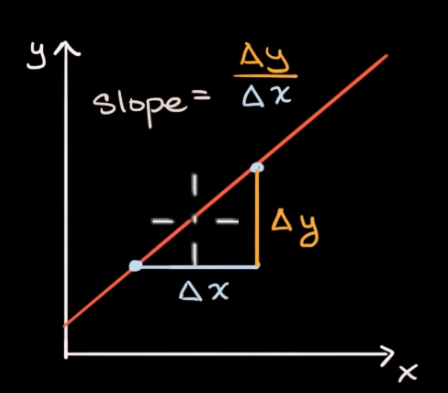

Starting point for x=90 and y=15
Points in x=[90, 92, 94, 96] and y=[16, 19, 22, 25]
y2=19,y1=16,x2=92,x1=92- delta y=3, delta x=2- Slope: 1.5
y2=22,y1=19,x2=94,x1=94- delta y=3, delta x=2- Slope: 1.5
y2=25,y1=22,x2=96,x1=96- delta y=3, delta x=2- Slope: 1.5
We can see any rate of change remains same: 1.5


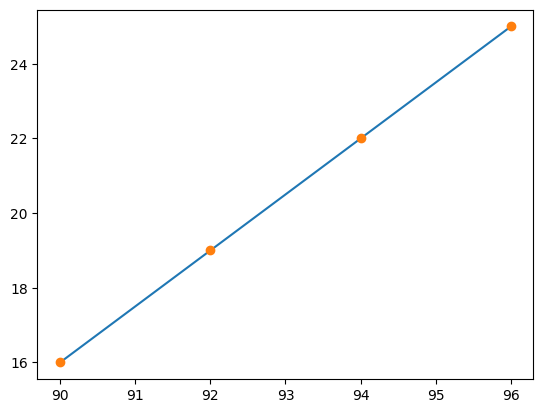

In [7]:
#Showing slope on a line, i.e. constant rate of change, remains same
import matplotlib.pyplot as plt
from numpy import random
a = random.randint(1,100)
b = random.randint(1,100)

print(f"Starting point for x={a} and y={b}")

x = [z+a for z in range(0,8,2)]    #4 points 2 points apart
y = [z+b for z in range(1,12,3)]   #4 points 3 points apart

print(f"Points in x={x} and y={y}")

plt.plot(x,y)
plt.plot(x,y,'o')


for z in range(len(x)):
    if z<3:
        y2=y[z+1]; y1=y[z]
        x2=x[z+1]; x1=x[z]
        dy=y2-y1; dx=x2-x1
        print(f"y2={y2},y1={y1},x2={x2},x1={x2}- delta y={dy}, delta x={dx}",end='- Slope: ')
        print(dy/dx)
print('We can see any rate of change remains same:',(y[3]-y[0])/(x[3]-x[0]))

# Calculus
- it lets us calculate the instantaneous rate of change of a curve, i.e. the rate of change of an object that is constantly changing
- If we want to calcualte the average rate of change of a curve between 2 points, here A and B or C and D. 
    - We can treat those as two secant lines and find their slope
    - Secant Line: a secant is a line that intersects a curve at a minimum of two distinct points. The word secant comes from the Latin word secare, meaning to cut.
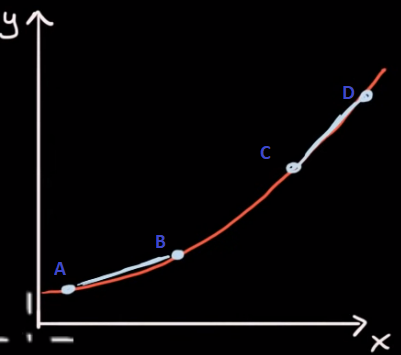

- But if we want to find the rate of change at a point (instantaneous rate of change, at a point)
    - Here we want to find the rate of change of Y, at that exact point wrt X
    - We can draw a tangent line which touches the slope at that point, that line will give us the rate of change at that point (i.e. instantaneous rate of change)
    - instantaneous rate of change - like a sprinter's speed at a point of time (considering x as time and y as speed), so we are looking at his speed at that point of time or that instance

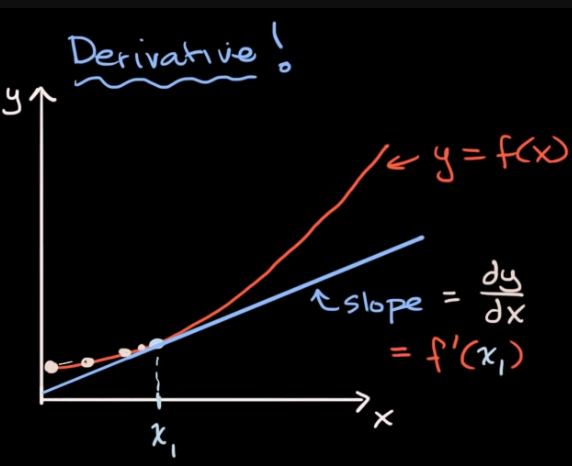

## Secant lines - show average rate of change
- As we can see below, the rate of change between x=1 and x=3, for the function y=x^2 = 4
- But we this is not the instantaneous rate of change for the curve, as the secant line (in blue) slope doesnt match that of the curve's slope within x=1,3 at every point
- So secant lines give us average rate of change or overall rate of change

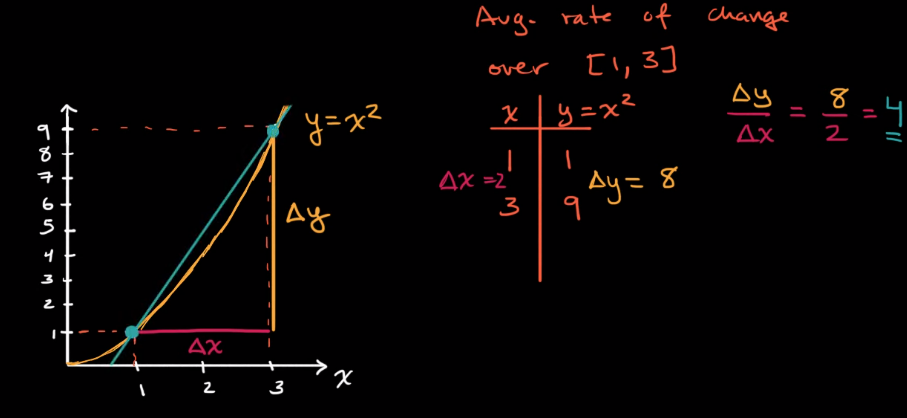

- Leibniz's notation or differential notation
    - If we are looking at changes in secant lines and then keep decreasing their distance, we approach a point where change in x comes close to be 0
    - i.e. super small change in y wrt to super small change in x
    - Here y = f(x), if we input a value of x, we get the value of y
    - Here dy/dx=f'(x1), if we input the value of x1, we get the slope at that point
        - f' is called Lagrange's notation or f prime, represents the derivative, the slope of the tangent line at a given point

- What is derivative notation?
    - Derivatives are the result of performing a differentiation process upon a function or an expression. Derivative notation is the way we express derivatives mathematically. This is in contrast to natural language where we can simply say "the derivative of...".
    
- Leibniz's notation
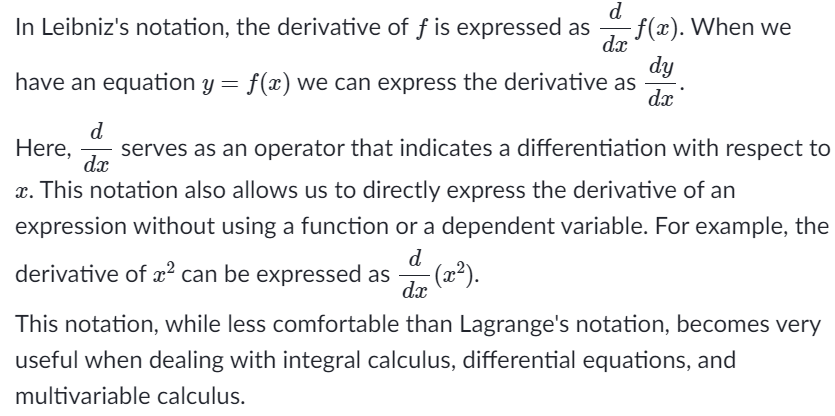

### Example: g(x)=sqrt x. How can we express the derivative of  sqrt x?
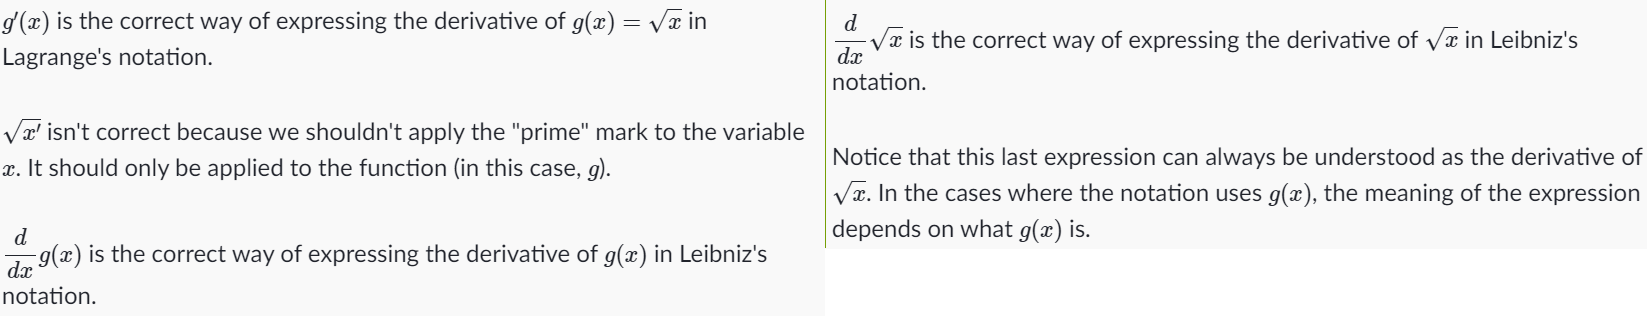

## Example 2:
- Estimate f'(5)
    - Options: a) -2  b)0.1  c)2   d) -0.1    d) 0
- Answer: As we can see in the point where x=5, we can draw a tangent and in that tangent, it looks like for every 1 unit of x, y increases 2 units. So dy/dx=2/1 = 2
    - We can also see the other options are way off
    - -2 : will mean a increasing x, y decreases. The slope will be opposite like \ instead of /
    - 0.1 or -0.1: will mean a very flat slope, which will be near the 0 point
    - 0 : will mean no slope, so even by process of elemination we can conclude our slope at f'(5) is 2
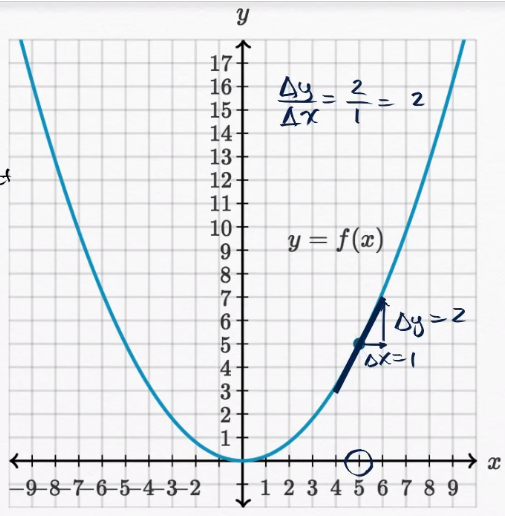

## Example 3:
- Compare if g'(4) ___ g'(6)
    - Options: a) <  b) >
- Answer: If we draw two tangents, we can see at g'(4), for 1 change in x, y decreases by -1. So g'(4)=dy/dx=-1/1=-1
    - For g'(6), for every 1 change in x, y decreases by -3, so g'(6) = -3/1= -3
    - g'(4) =-1,  g'(6)=-3
    - So, g'(4) > g'(6)
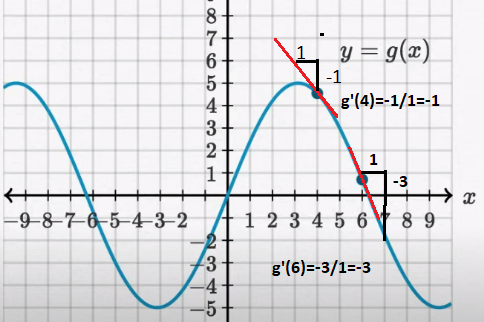

## Example 4: 
- Compare: f'(-4) ___ f'(-1)
- Answer: The derivative f'(x) of a function (f) at a point (x) can be viewed as the steepness and direction, or slope, of the function's graph at that point.
    - Here we see the steepness and direction of the graph of f at the points where x=-4 and x=-1:
    - We can see that the graph is decreasing at both points. This means both f'(-4) and f'(-1) are negative
        - we can see the graph is steeper when x=-4 this means f'(-4) has a greater absolute value than f'(-1)
        - Since f'(-4) and f'(-1) are both negative, f'(-4)<f'(-1)
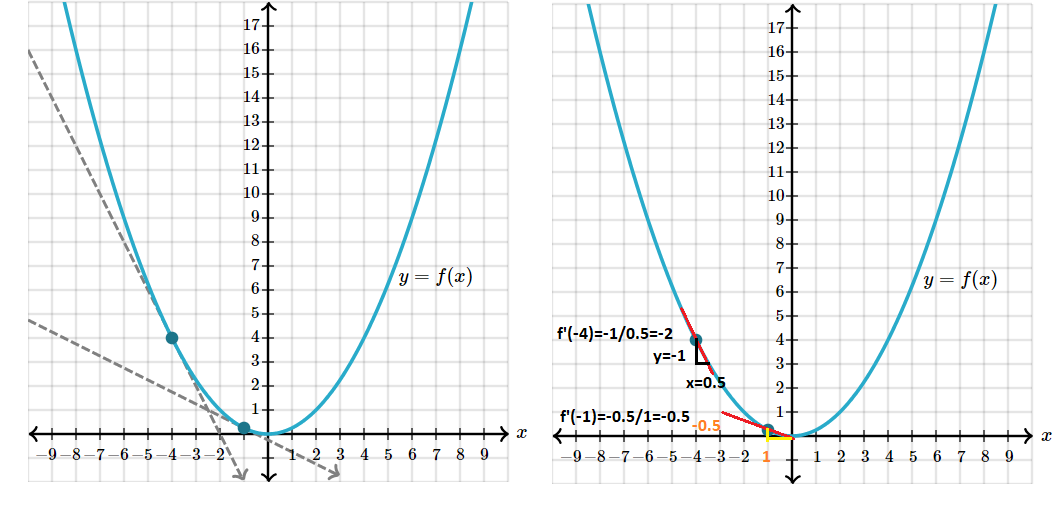

## Example 5: Function
- Find where f(x)>0 and f'(x)<0
    - So, we have to put the blue highlight on the graph, where the function is +ve but the function deravative is -ve
    - In the red box section, the function f(x) is -ve, so we cannot choose anything from there.
    - In the green box sections, the function derivative is +ve,  so we cannot choose anything from there either.
    - Only the sections where the blue highlights are satisfy our condition of, +ve function but -ve derivative
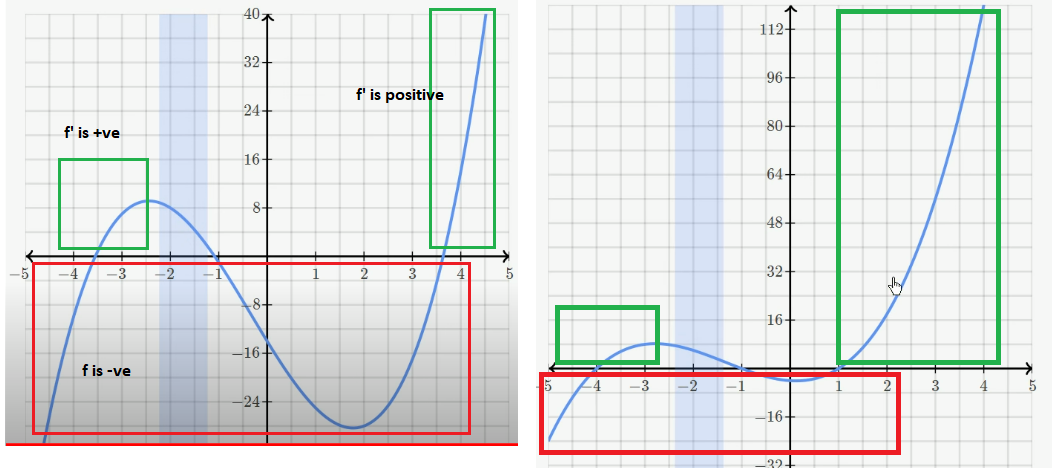

In [8]:
# What is the slope of the secant line that intersects the graph of 
## g(x)=3**2x at x=0 and x=2
x = [0,2]
y = []
print("x | g(x)", end='\n'+"-"*9+'\n')
for x_val in x:
    g_x=3**(2*x_val)
    print(x_val,"|",g_x)
    y.append(g_x)

slope=(y[1]-y[0])/(x[1]-x[0])
print("slope=",slope)

x | g(x)
---------
0 | 1
2 | 81
slope= 40.0


In [9]:
# What is the average rate of change of f(x) = x**2+5x over the interval [1,5]?
x= [1,5]
y= []

print("x | f(x)", end='\n'+"-"*9+'\n')
for x_val in x:
    f_x = (x_val**2)+(5*x_val)
    y.append(f_x)
    print(x_val,"|",f_x)

slope=(y[1]-y[0])/(x[1]-x[0])
print("slope=",slope)

x | f(x)
---------
1 | 6
5 | 50
slope= 11.0


In [10]:
# What is the slope of the secant line that intersects the graph of, h(x) = 16-x**2, x=1 and x=4?

# What is the average rate of change of f(x) = x**2+5x over the interval [1,5]?
x= [1,4]
y= []

print("x | h(x)", end='\n'+"-"*9+'\n')
for x_val in x:
    h_x = (16-(x_val**2))
    y.append(h_x)
    print(x_val,"|",h_x)

slope=(y[1]-y[0])/(x[1]-x[0])
print("slope=",slope)

x | h(x)
---------
1 | 15
4 | 0
slope= -5.0


In [11]:
# What is the average rate of change of h(x) = 1/(10-x) over the interval, 5<=x<=8
x= list(range(5,9,1))
y= []

print("x | h(x)", end='\n'+"-"*9+'\n')
for x_val in x:
    h_x = (1/(10-x_val))
    y.append(h_x)
    print(x_val,"|",h_x)

print(y[3]-y[0],"/",x[3]-x[0])

x | h(x)
---------
5 | 0.2
6 | 0.25
7 | 0.3333333333333333
8 | 0.5
0.3 / 3


## Estimating Derivatives
- We dont have total data in these queries, we are trying to make an estimate for the instantaneous rate of change at a point, comparing with its nearest data sets available
    - In the below example, we need to find f'(4), so we draw a secant line between its closest data points given to us, x=3 and 5
    - We then find the slope of that secant line (blue) to find an estimated instantaneous rate of change at x=4, which is 8.5 here
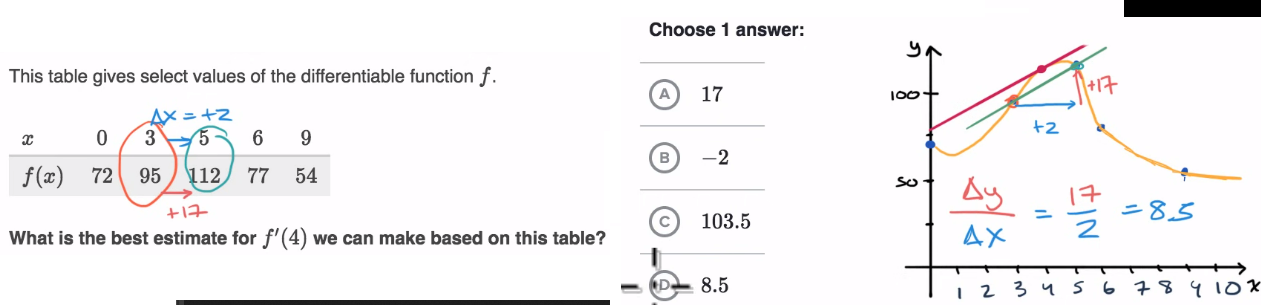

## 1. This table gives select values of the differentiable function f

In [12]:
import numpy as np
x = np.array([-12,-9,-7,-6,-5, -4])
f_x=np.array([  7,-4,-3, 3, 2,-11])
#What is the best estimate for f'(-11) we can make based on this table?


x_val=-11
    
def f_func_slope_nearest(x, f_x, x_val):
    #choose the closest points
    x_diff=abs(x-x_val)

    #choose the closest points
    x_diff=abs(x-x_val)

    #Find the closest points
    x_calc=[]
    y_calc=[]
    for z in range(2):
        k=np.argmin(x_diff)
        x_calc.append(x[k])
        y_calc.append(f_x[k])
        x_diff=np.delete(x_diff,k)
        f_x=np.delete(f_x,k)
        x=np.delete(x,k)

    print("Closest x points=",x_calc, "- Respective f(x) values=",y_calc)
    slope=(y_calc[1]-y_calc[0])/(x_calc[1]-x_calc[0])
    print("Slope=",slope)

f_func_slope_nearest(x,f_x, x_val)

Closest x points= [-12, -9] - Respective f(x) values= [7, -4]
Slope= -3.6666666666666665


## 2. This table gives select values of the differentiable function 

In [13]:
x = np.array([  1,  4,  6,  7,  9, 12])
f_x=np.array([-25,-33,-19,-37,-31,-24])

#What is the best estimate for f'(-11) we can make based on this table?
x_val=13

f_func_slope_nearest(x,f_x, x_val)

Closest x points= [12, 9] - Respective f(x) values= [-24, -31]
Slope= 2.3333333333333335


## 3. This table gives select values of the differentiable function f

In [14]:
import numpy as np
x = np.array([  6,  7, 10, 13, 15])
f_x=np.array([-82,-89,-99,-88,-74])



#What is the best estimate for f'(-11) we can make based on this table?
x_val=9

f_func_slope_nearest(x,f_x, x_val)

#choose the closest points
x_diff=abs(x-x_val)

Closest x points= [10, 7] - Respective f(x) values= [-99, -89]
Slope= -3.3333333333333335


## 4. This table gives select values of the differentiable function f.
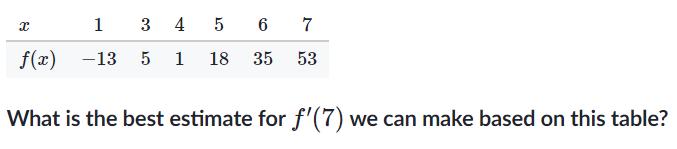

In [15]:
import numpy as np
x = np.array([  1, 3, 4,  5,  6,  7])
f_x=np.array([-13, 5, 1, 18, 35, 53])

#What is the best estimate for f'(-11) we can make based on this table?
x_val=7

f_func_slope_nearest(x,f_x, x_val)

Closest x points= [7, 6] - Respective f(x) values= [53, 35]
Slope= 18.0


# QUIZ 1
https://www.khanacademy.org/math/old-ap-calculus-ab/ab-derivative-intro/ab-estimate-derivatives/quiz/ab-derivative-intro-quiz-1


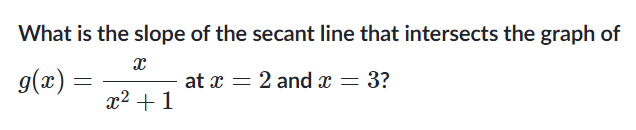

In [16]:
x=[2,3]
y=[]
print("x | h(x)", end='\n'+"-"*9+'\n')

for z in x:
    fx=(z/(z**2+1))
    y.append(fx)
    print (z,"|",fx)

slope=(y[1]-y[0])/(x[1]-x[0]) 
print("Slope=",slope)
print("Slope=",round((y[1]-y[0])*10),"/",(x[1]-x[0])*10)

x | h(x)
---------
2 | 0.4
3 | 0.3
Slope= -0.10000000000000003
Slope= -1 / 10


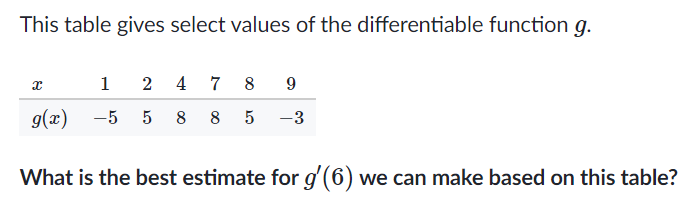

In [17]:
import numpy as np
x = np.array([ 1, 2, 4,  7,  8,  9])
f_x=np.array([-5, 5, 8,  8,  5, -3])

#What is the best estimate for f'(-11) we can make based on this table?
x_val=6

f_func_slope_nearest(x,f_x, x_val)

Closest x points= [7, 4] - Respective f(x) values= [8, 8]
Slope= -0.0


## Secant line with arbitrary difference
- A secant line intersects the curve y=log(x) at two points with x=2 and x=2+h
    - What is the slope of the secant line?
- So at point x=2  , y=log(x)= ln(2)   = [2, ln(2)]
- So at point x=2+h, y=log(x)= ln(2+h) = [2+h, ln(2+h)]
- dy = ln(2+h) - ln(2), dx = 2+h-2
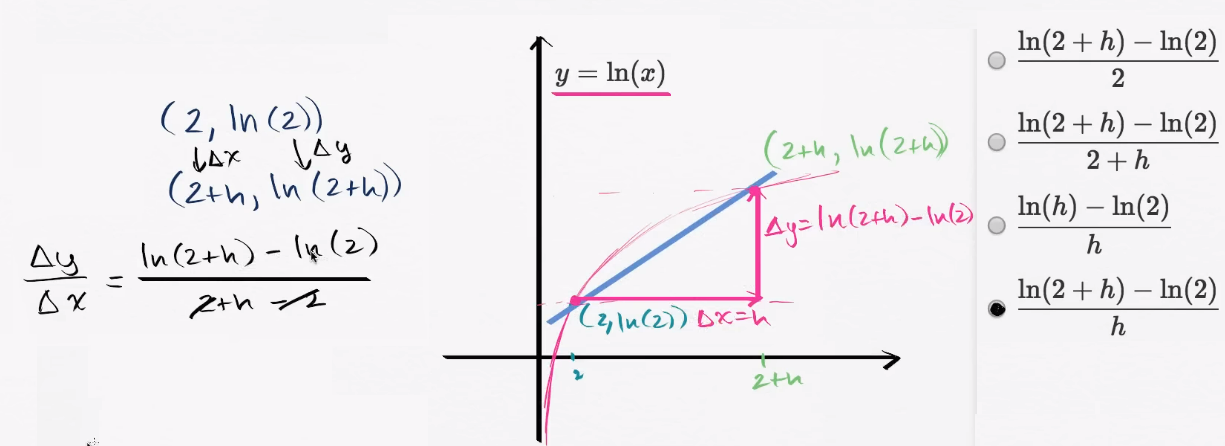

## Secant line with arbitrary point
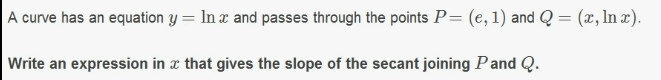

- Answer: ln x- 1 / x-e
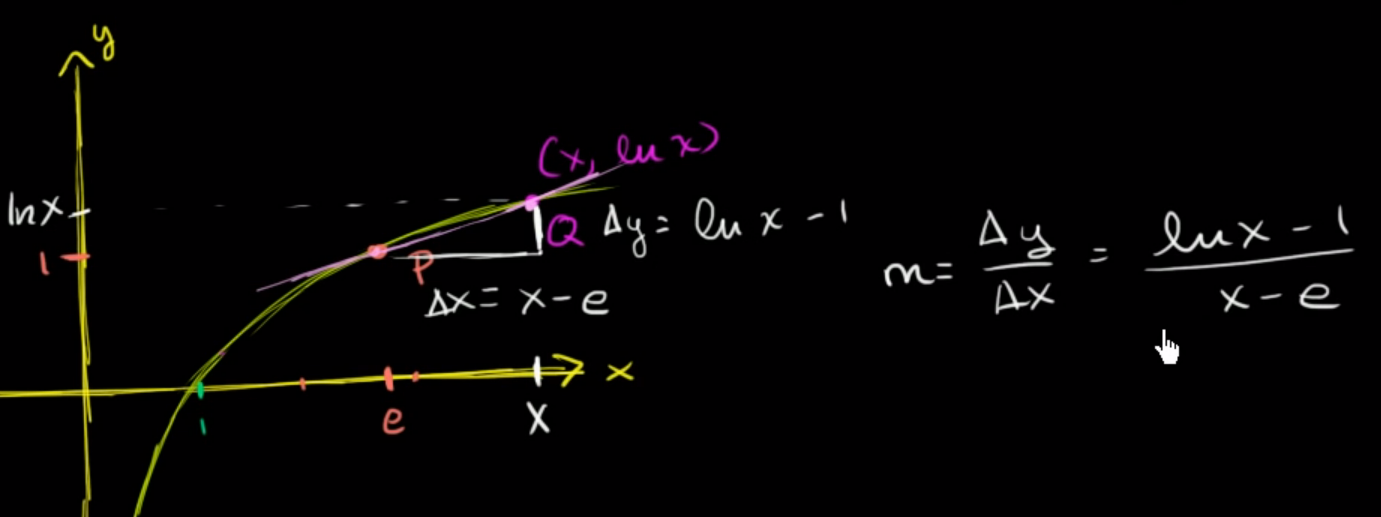

## Example 2:
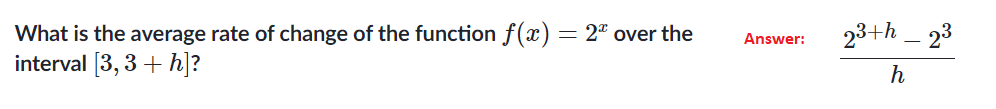

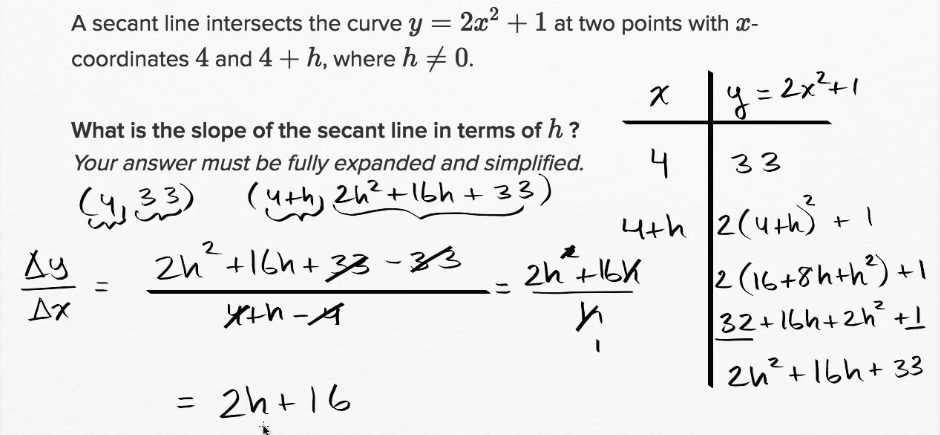
- Self calculation
    - f(4)= 2*4^2+1 = 2*16+1 = 33
    - f(4+h)= 2*(4+h)^2+1  = 2(16 + h^2+ 8h) + 1  -- a^2+b^2+ 2ab 
        - = 33 + 2h^2+16h

    - dy/dx=33 + 2h^2+16h - 33/ 4+h-4 = 2h^2+16h/h = 2h+16

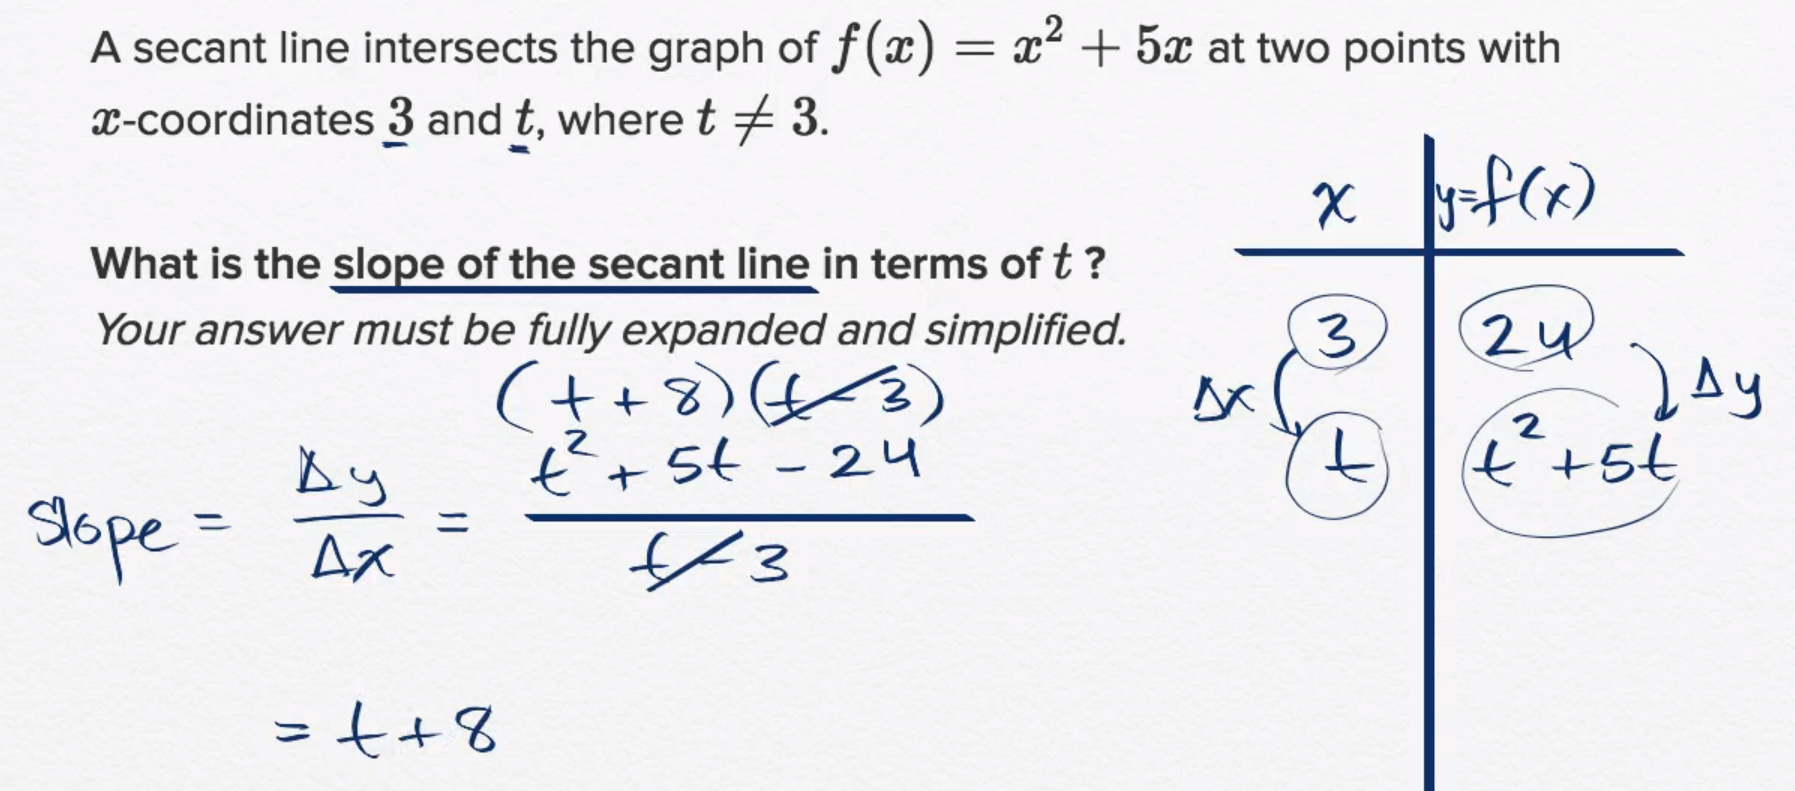
- Self calculation
    - f(x) = x^2+5x
    - f(3) = 9+15 = 24
    - f(t) = t^2+5t
    - dy = t^2+5t-24 = t^2-t3+24+8t = (t+8)(t-3) 
    - dx = t - 3

dy/dx = (t+8)(t-3) / t-3 = t+8


# Quiz 2
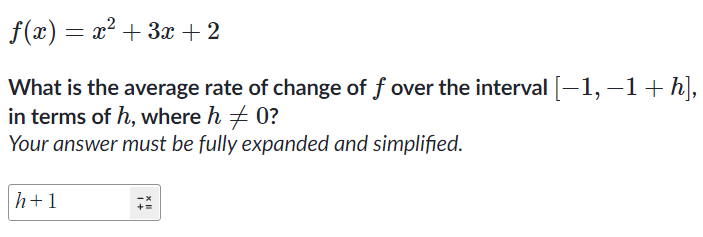

- f = x^2 + 3x + 2
- f(-1)   = -1^2 + 3*-1 + 2 = 1 -3 + 2 = 0
- f(-1+h) = (-1+h)^2 + 3(-1+h)+ 2 = 1+h^2+(2*-1*h)-3+3h+2
         = 1+h^2-2h+3h-3+2 = h^2 +h + 0
 
- dx = -1+h-(-1) = h
 
- dy/dx = h^2 +h / h  = h+1

https://www.khanacademy.org/math/old-ap-calculus-ab/ab-derivative-intro/ab-defining-derivative/v/calculus-derivatives-1-new-hd-version

# Formal definition of the derivative as a limit

- In the example below, we are trying to find the slope at the point Xo
- First we get the slope between Xo and Xo+h, where h is change in X
- Then we find the normal slope using dy/dx = f(Xo-h) - f(Xo)/h
- But if we need to find the slope at point Xo, we need to decrease h so that h tends to be 0, then we can get the slope at Xo
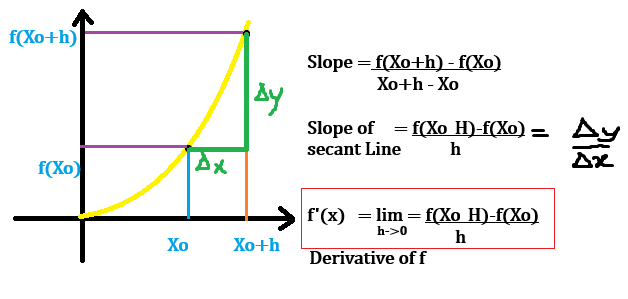

## Finding slope at a point

- We can write it 2 ways
- 1st way
    - h = change in x = delta x
    - f'(x) = lim h->0,  f(x+h) - f(x) / h
- 2nd Way: Directly
    - a = some point in the urve
    - x = point where we want to find the slope
    - f'(x) = lim x-> a,  f(x) - f(a) / x - a
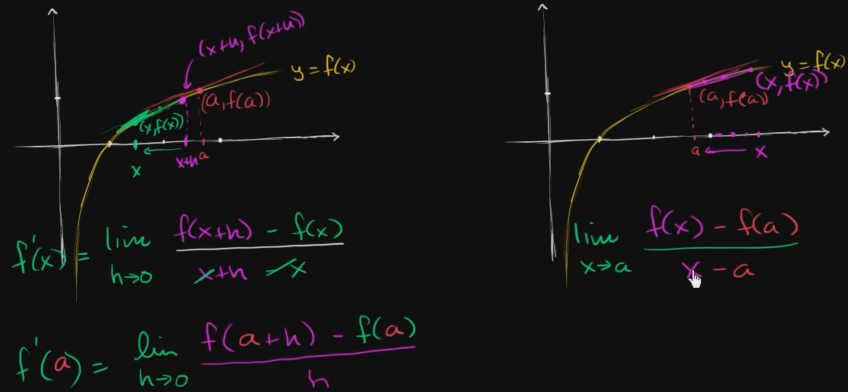

## Example:
- On left we are defining it in the formal way
- On right it is defined a;ternative way, i.e. straight forward
- f(x) = ln (x) -> ln - log
- f'(e) =  find this?
- Note we know the point (e,1) as the log(e) = 1
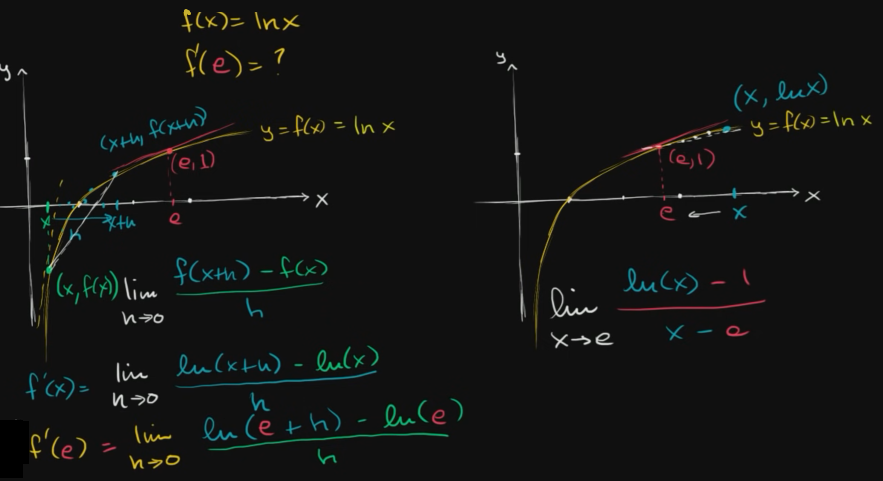

# Questions

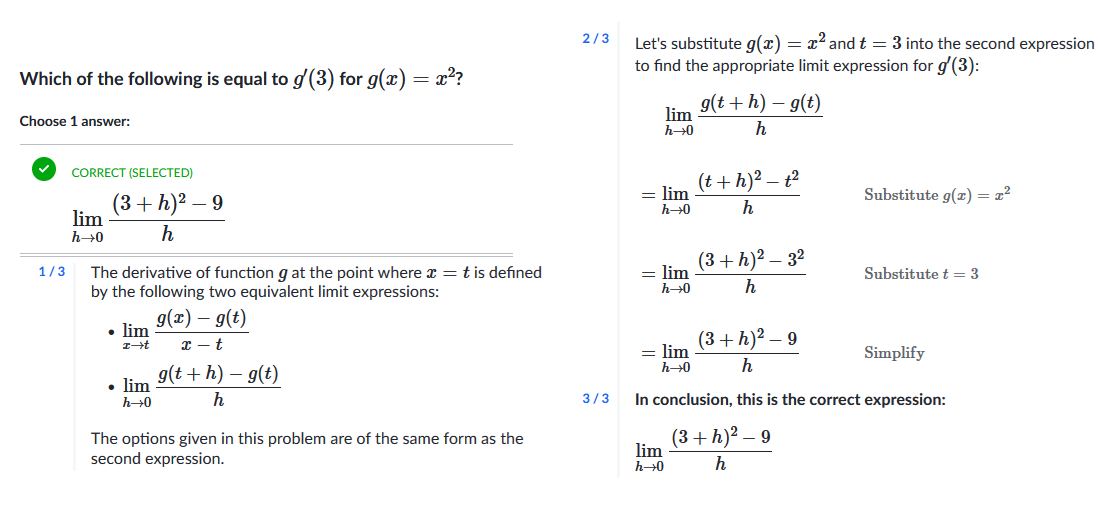

## Quiz 2
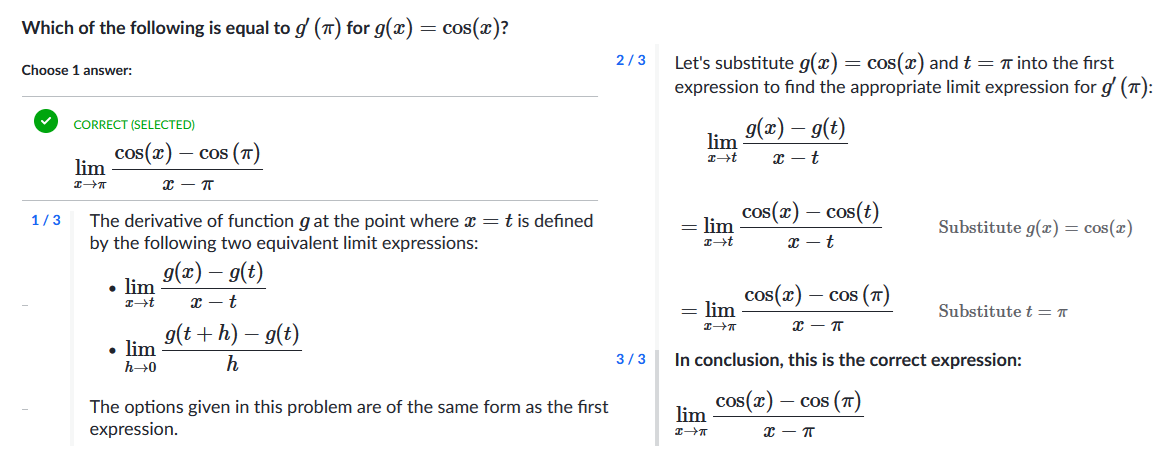

## Quiz 3
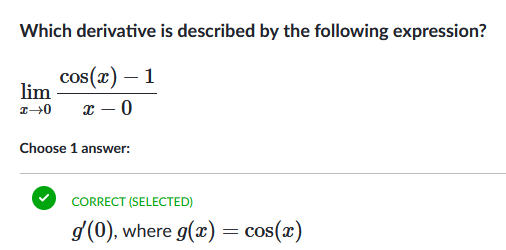

## Quiz 4
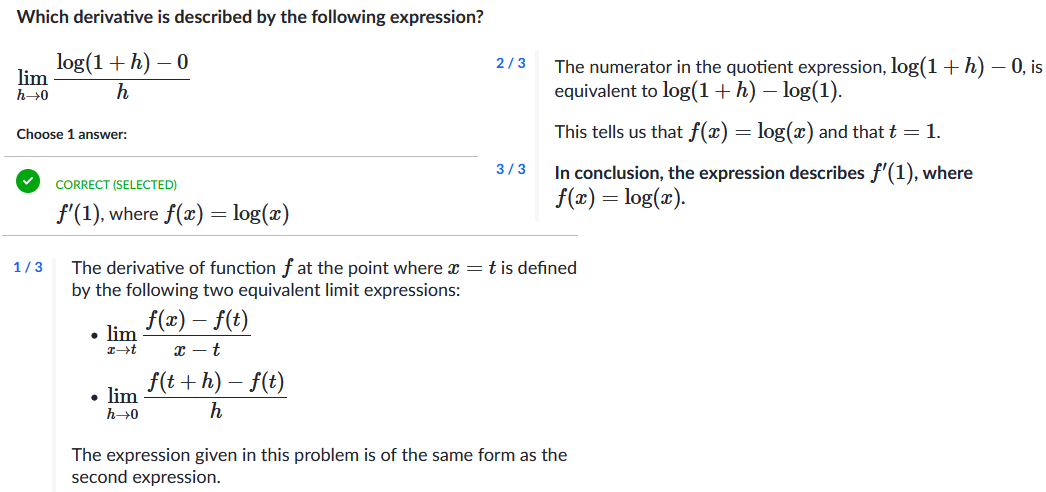

# Finding the derivative at a point for a function
- If f(x) = x^2
- dy/dx = (x+h)^2 - x^2 / x+h-x = x^2 + 2xh + h^2 - x^2 / h = 2xh + h^2 /h = 2x + h
- when, f'(x) = lim h->0 = 2x+h = 2x
    - here f(x) gives the value of the function, f'(x) gives the slope of the function at a given point
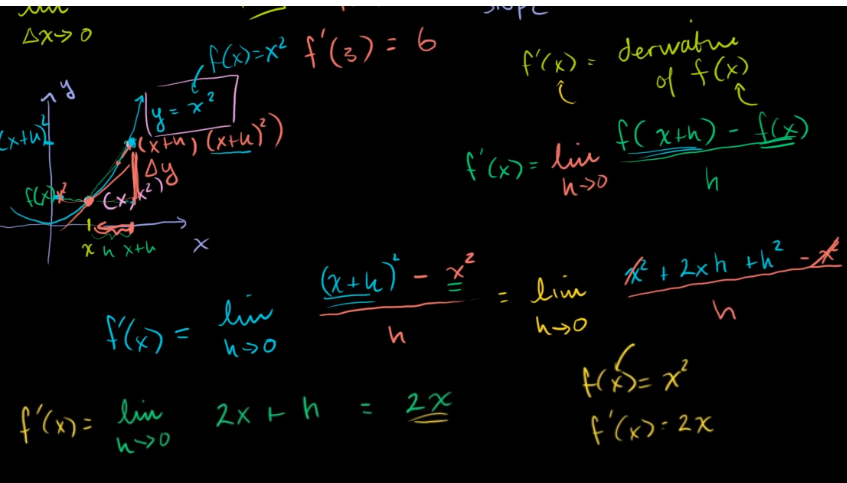